Firstly let's take the dataset, split characteristic and target and divide it in training e test set

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Split characteristic (X) and Target (y)
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
    'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
    'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock'
])

y = df[['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
        'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
        'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock']].idxmax(axis=1)

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the dimensions of the training and testing sets
print(f"Dimensioni del training set: {X_train.shape}, {y_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}, {y_test.shape}")


Dimensioni del training set: (36048, 13), (36048,)
Dimensioni del test set: (9013, 13), (9013,)


Second, let's run GridSearch in order to find the best parameter for our model from the ones that we have decided to evaluate

In [ ]:
# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [ 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [ 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [ 2, 4],    # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]        # Method of sampling data
}

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Execute the grid search
grid_search_rf.fit(X_train, y_train)

# Output the best parameters found
print("Migliori parametri trovati:", grid_search_rf.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Migliori parametri trovati: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


**Migliori parametri trovati: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}**

Let's see the performance of the model And the confusion matrix

Accuracy sul test set: 0.5771663153223122
                         precision    recall  f1-score   support

music_genre_Alternative       0.50      0.31      0.38       864
      music_genre_Anime       0.78      0.74      0.76       927
      music_genre_Blues       0.64      0.53      0.58       912
  music_genre_Classical       0.84      0.86      0.85       868
    music_genre_Country       0.57      0.59      0.58       941
 music_genre_Electronic       0.63      0.61      0.62       939
    music_genre_Hip-Hop       0.42      0.45      0.44       887
       music_genre_Jazz       0.53      0.49      0.51       884
        music_genre_Rap       0.42      0.38      0.40       892
       music_genre_Rock       0.48      0.81      0.60       899

               accuracy                           0.58      9013
              macro avg       0.58      0.58      0.57      9013
           weighted avg       0.58      0.58      0.57      9013



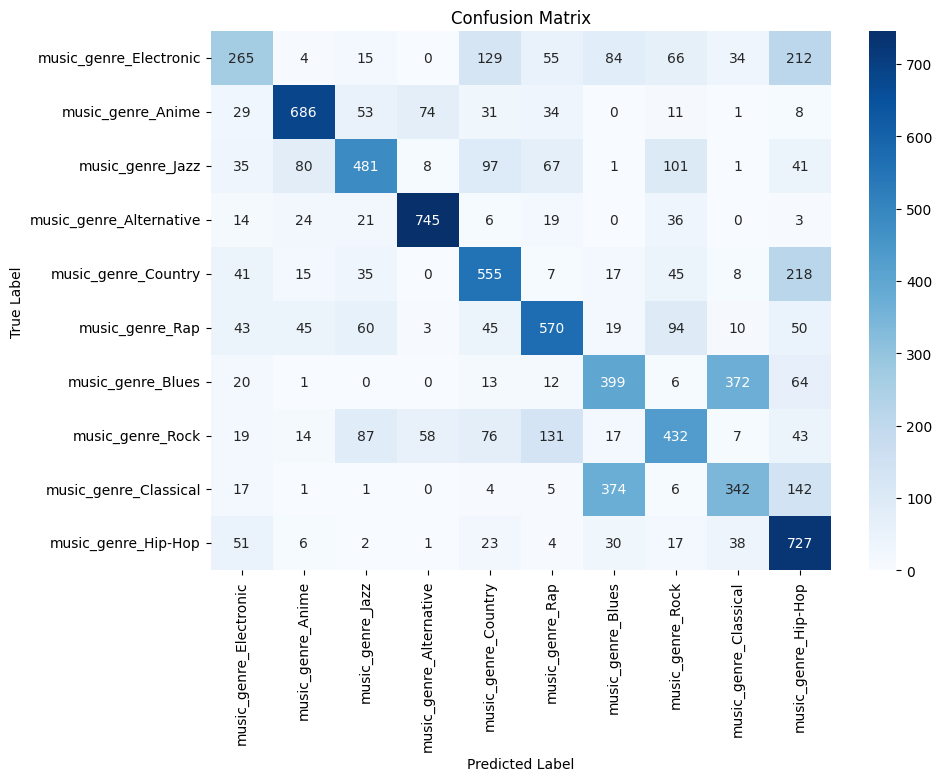

In [ ]:
# Import necessary libraries for confusion matrix and plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Predict on the test set using the best model
y_pred = grid_search_rf.best_estimator_.predict(X_test)

# Evaluate the model's performance
print("Accuracy sul test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In the SVM model we tried 2 approach in order to have a more precise model, now let's if this is reflected in the Random Forest model too.
First try: removing the two most critical genres from the set

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Escludi le righe dove 'Alternative' o 'Hip-Hop' sono il genere
df = df[(df['music_genre_Alternative'] == 0) & (df['music_genre_Hip-Hop'] == 0)]

# Define features (X) and target (y), removing 'Alternative' and 'Hip-Hop'
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Rock',
    'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical',
    'music_genre_Country', 'music_genre_Electronic', 'music_genre_Hip-Hop',
    'music_genre_Jazz', 'music_genre_Rap'
])

# Define target without 'Alternative' and 'Hip-Hop'
y = df[['music_genre_Rock', 'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical',
        'music_genre_Country', 'music_genre_Electronic', 'music_genre_Rap',
        'music_genre_Jazz']].idxmax(axis=1)

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


After splitting we run the generation of the model using the optimized parameter found with Gridsearch

Accuracy sul test set: 0.6865029823831322
                        precision    recall  f1-score   support

     music_genre_Anime       0.80      0.74      0.77       948
     music_genre_Blues       0.61      0.50      0.55       875
 music_genre_Classical       0.83      0.85      0.84       903
   music_genre_Country       0.59      0.59      0.59       853
music_genre_Electronic       0.64      0.60      0.62       903
      music_genre_Jazz       0.58      0.52      0.55       908
       music_genre_Rap       0.83      0.82      0.82       917
      music_genre_Rock       0.60      0.86      0.71       902

              accuracy                           0.69      7209
             macro avg       0.69      0.68      0.68      7209
          weighted avg       0.69      0.69      0.68      7209



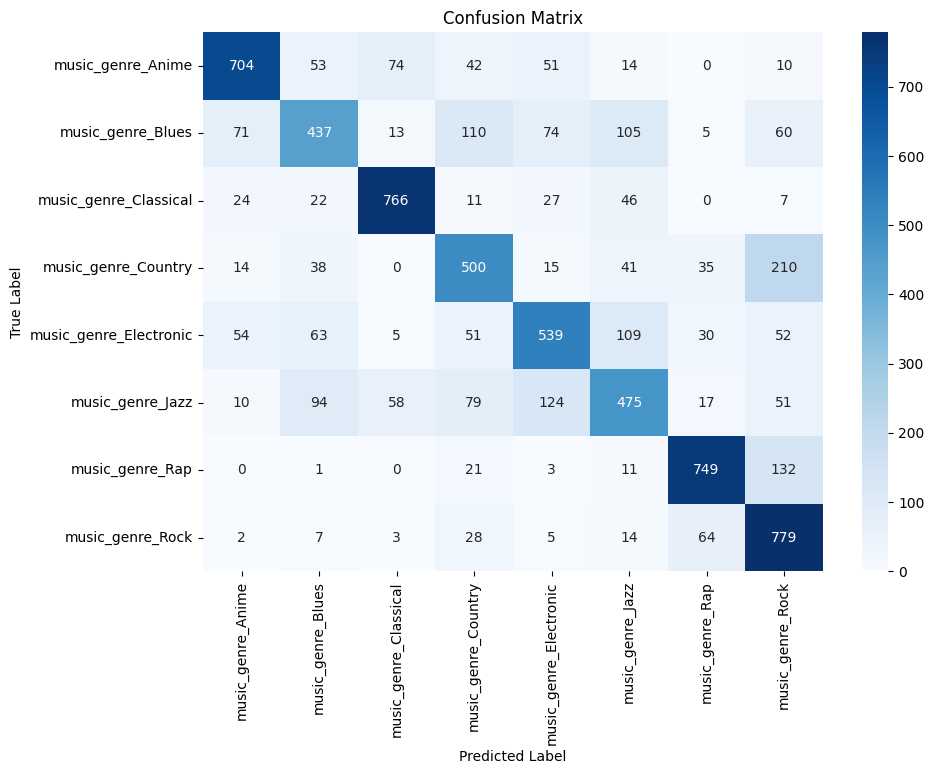

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
# Create the RandomForestClassifier model with optimized parameters
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    bootstrap=False,
    random_state=42
)

# Training the model
rf_optimized.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_optimized.predict(X_test)

# Evaluate model performance
print("Accuracy sul test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using an heatmap with correct labels
plt.figure(figsize=(10, 7))

# Use the labels from the model to ensure they are in the correct order
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_optimized.classes_, yticklabels=rf_optimized.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Vediamo Qui invece se raggruppare i generi possa darci risulati importanti al fine della generazione del modello

Accuracy sul test set: 0.6821258182625097
                        precision    recall  f1-score   support

         Grouped_Genre       0.73      0.85      0.78      2643
     music_genre_Anime       0.79      0.74      0.76       927
     music_genre_Blues       0.64      0.52      0.57       912
 music_genre_Classical       0.83      0.86      0.85       868
   music_genre_Country       0.61      0.55      0.58       941
music_genre_Electronic       0.64      0.59      0.61       939
      music_genre_Jazz       0.55      0.46      0.50       884
      music_genre_Rock       0.55      0.58      0.56       899

              accuracy                           0.68      9013
             macro avg       0.67      0.64      0.65      9013
          weighted avg       0.68      0.68      0.68      9013



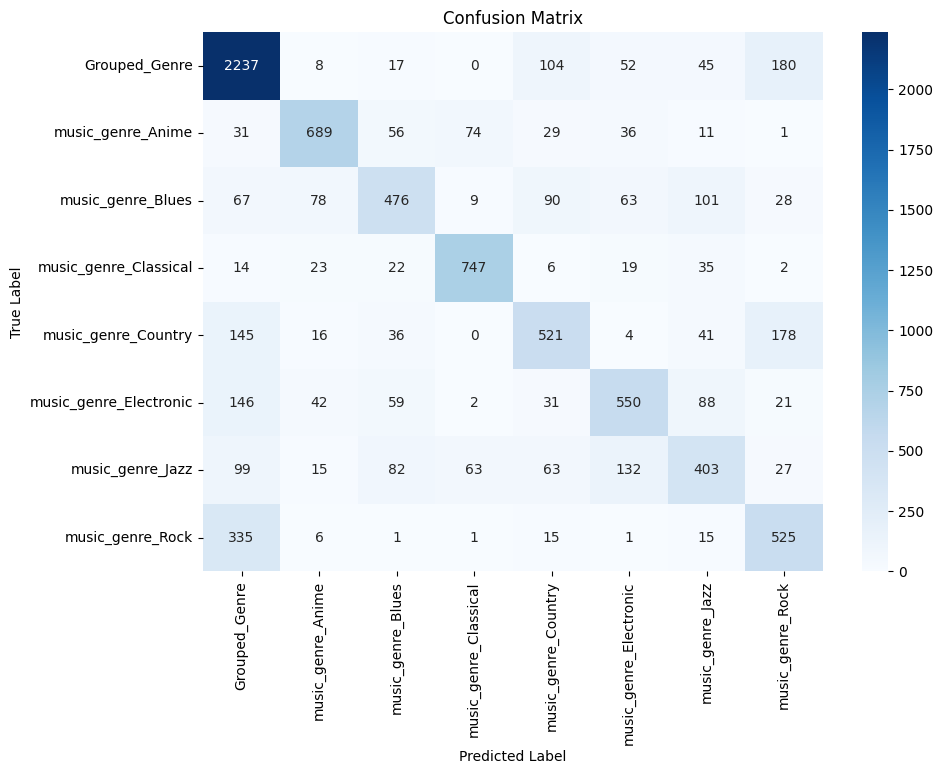

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Raggruppa Alternative, Rap, Hip-Hop in un unico genere, creiamo una nuova colonna per il target
df['Grouped_Genre'] = df[['music_genre_Alternative', 'music_genre_Rap', 'music_genre_Hip-Hop']].max(axis=1)

# Definiamo il target (y) combinando i generi raggruppati con gli altri generi
y = df[['Grouped_Genre', 'music_genre_Rock', 'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical',
        'music_genre_Country', 'music_genre_Electronic', 'music_genre_Jazz']].idxmax(axis=1)

# Rimuovi le colonne che non servono più da X (caratteristiche)
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Rock', 'music_genre_Rap', 'music_genre_Hip-Hop',
    'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country',
    'music_genre_Electronic', 'music_genre_Jazz' , 'Grouped_Genre'
])

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the model parameter
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    bootstrap=False,
    random_state=42
)

# Training the model
rf_optimized.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_optimized.predict(X_test)

# Evaluate model performance
print("Accuracy sul test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using an heatmap with correct labels
plt.figure(figsize=(10, 7))

# Use the labels from the model to ensure they are in the correct order
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_optimized.classes_, yticklabels=rf_optimized.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


As we can see here, the grouping provides a significant gain in accuracy. Therefore, grouping the two sub-genres into a single genre yields a good model output without needing to remove the data related to those genres. Instead, we are incorporating them into a genre that they partly belong to.

Now let's move on to a graphical analysis of the model. In the generation of the SVM model, we showed the feature importance of the variables to correctly categorize the records. For the Random Forest model, we will look at both the feature importance and the learning curves, which will show us how the model's accuracy varies based on the number of samples used for training, helping us understand if the model is underfitting or overfitting.

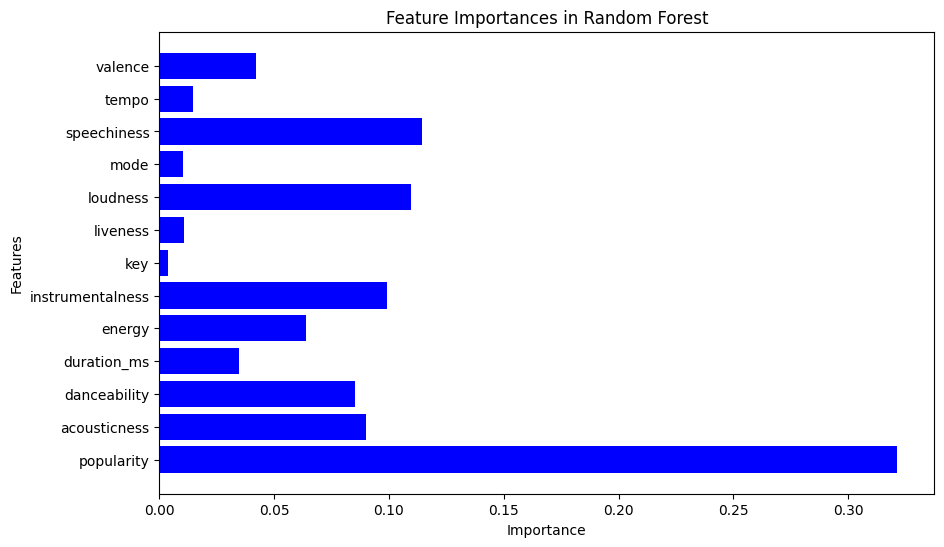

In [ ]:
import matplotlib.pyplot as plt
# Feature importance from Random Forest
importances = rf_optimized.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='b')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest')
plt.show()


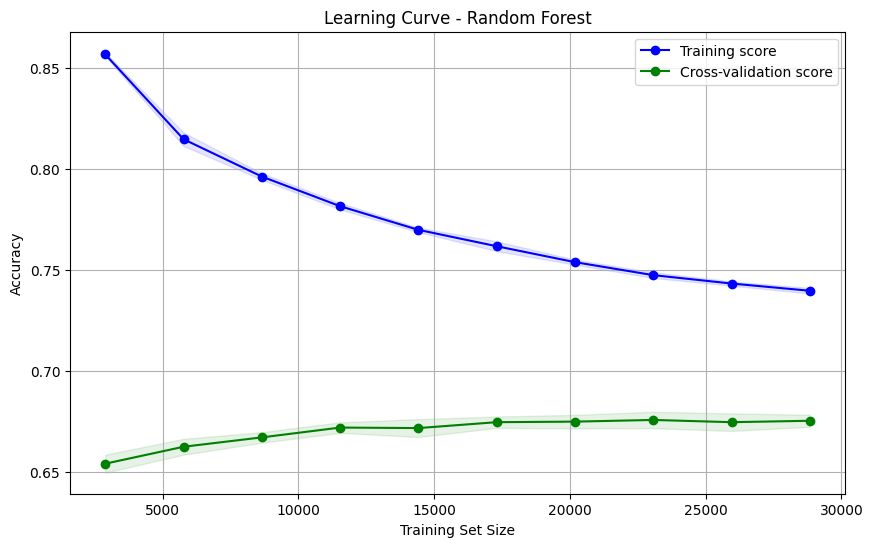

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Definition of the optimized RandomForest model
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42
)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_optimized, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation for training and test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')

# Add standard deviation bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show()


* Training Curve (blue):
The training curve starts with a relatively high accuracy (~0.85), but decreases as the number of training examples increases. This behavior is normal because, with few training examples, the model can "fit" the available data better and achieve high accuracy (even if it might be overfitting). However, with more data, the training accuracy drops because the model finds it harder to memorize all the patterns, forcing it to generalize more. The constant decline suggests that the model is learning correctly as more data is added, but it doesn't seem to have severe overfitting issues, since the training accuracy is not excessively high compared to the test accuracy.

* Validation Curve (green):
The cross-validation curve starts with a lower accuracy (~0.65) and shows a slight improvement as the training set increases, but stabilizes around 0.68. This indicates that the model is generalizing relatively well and does not appear to suffer from extreme overfitting. However, the gap between the training and validation curves suggests that there is still room for improvement.

* Conclusions:
There doesn't seem to be strong overfitting. If there were, you would see a training curve that is much higher than the validation curve.
Underfitting: There is some distance between the two curves, and the accuracy is not very high (~0.70 for validation), suggesting that the model may require further tuning to enhance its predictive ability